In [4]:
# Importing the dataset

import pandas as pd

df = pd.read_csv('data\weight-height.csv')

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.isna().mean()

Gender    0.0
Height    0.0
Weight    0.0
dtype: float64

In [7]:
#drop Gender to demonstrate simple linear regression of weight based on height
df.drop(['Gender'],axis=1,inplace=True)
#separate dependant and independant variable
X = df.drop(['Weight'],axis=1) #X needs to be a DataFrame or 2D array
y = df.Weight #y needs to be a Series or 1D array
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


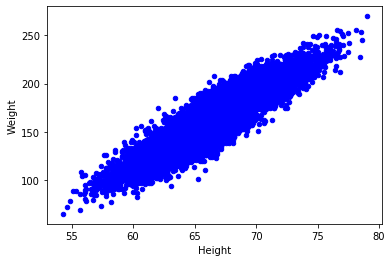

In [8]:
import matplotlib.pyplot as plt

# a scatter plot comparing Height and Weight variable
df.plot(kind='scatter',x='Height',y='Weight',color='blue')
plt.show()

In [9]:
df.shape

(10000, 2)

In [10]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


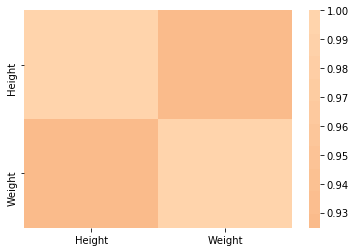

In [11]:
import seaborn as sns
ht = sns.heatmap(df.corr(), center=0)

In [12]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [13]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
#train the model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model.intercept_ #b0

-351.17684317553704

In [21]:
model.coef_ #b1

array([7.72410571])

Regression line is given by the equation:
y_pred = b0 + b1 * x1

which means
Weight_pred = -351 + 7.7 * Height 

In [19]:
import sklearn
sklearn.__version__

'0.22.1'

In [23]:
#predict y values
y_pred = model.predict(X_test)
y_pred

array([148.75722233, 168.44051433, 224.43102282, ..., 141.43885204,
       140.78810736, 147.69885803])

In [24]:
#check the mean squared error between the predicted and true values on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_test,y_pred)) # mae = mean(|y_pred - y_test|)
print(mean_squared_error(y_test,y_pred)) # mse = mean[(y_pred - y_test)^2]


9.845147891122123
152.22371121059726


In [42]:
X_test.head()

,Height
9394,64.723877
898,67.272171
2398,74.520972
5906,65.880014
2343,64.846301


In [23]:
y_test.head()

9394    138.085796
898     187.363366
2398    216.533191
5906    131.761443
2343    157.718438
Name: Weight, dtype: float64

In [27]:
y_pred[:5]

array([148.75722233, 168.44051433, 224.43102282, 157.6873491 ,
       149.7028435 ])

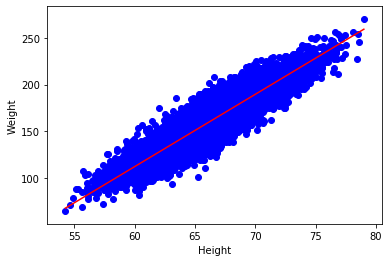

In [20]:
#plot best fit line
h = [[df.Height.min()],[df.Height.max()]]
w = model.predict(h)
plt.plot(h,w,color='red')
plt.scatter(df.Height,df.Weight,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [43]:
#r^2 coefficient of determination

model.score(X_train,y_train)   #Training score

0.8558937147068257

In [44]:
model.score(X_test,y_test)    #Test score

0.8535056083267063

In [48]:
.9247*.9247 # this shows that the co-eff of determination is square of the pearson coefficient in SLR

0.8550700899999999